In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def normalize_and_encode(dataframe):
    column_names_to_not_normalize = ['result']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp

    le = preprocessing.LabelEncoder()
    le.fit([ "H", "A", "D"])
    dataframe.loc[:,['result']]=le.transform(dataframe['result'])
    
    return dataframe

def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['result']).values
    y = dataframe[['result']].values
    return X,y

df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)
df04 = pd.read_csv('../data/sliding04_shots_and_possession.csv', sep=',', index_col=0)
df05 = pd.read_csv('../data/sliding05_shots_and_possession_extra.csv', sep=',', index_col=0)

n01 = normalize_and_encode(df01)
n02 = normalize_and_encode(df02)
n03 = normalize_and_encode(df03)
n04 = normalize_and_encode(df04)
n05 = normalize_and_encode(df05)

train01, test01 = train_test_split(n01, test_size=0.1)
print(len(train01), 'train examples')
print(len(test01), 'test examples')

train02, test02 = train_test_split(n02, test_size=0.1)
print(len(train02), 'train examples')
print(len(test02), 'test examples')

train03, test03 = train_test_split(n03, test_size=0.1)
print(len(train03), 'train examples')
print(len(test03), 'test examples')

train04, test04 = train_test_split(n04, test_size=0.1)
print(len(train04), 'train examples')
print(len(test04), 'test examples')

train05, test05 = train_test_split(n05, test_size=0.1)
print(len(train04), 'train examples')
print(len(test04), 'test examples')

train_X01,train_y01 = get_X_and_y(train01)
train_X02,train_y02 = get_X_and_y(train02)
train_X03,train_y03 = get_X_and_y(train03)
train_X04,train_y04 = get_X_and_y(train04)
train_X05,train_y05 = get_X_and_y(train05)

test_X01,test_y01 = get_X_and_y(test01)
test_X02,test_y02 = get_X_and_y(test02)
test_X03,test_y03 = get_X_and_y(test03)
test_X04,test_y04 = get_X_and_y(test04)
test_X05,test_y05 = get_X_and_y(test05)

18740 train examples
2083 test examples
6329 train examples
704 test examples
6329 train examples
704 test examples
6296 train examples
700 test examples
6296 train examples
700 test examples


In [3]:
n01

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,2,0.049957,0.165301,0.330601,0.183667,0.110200,0.073467,0.514268,0.367334,0.073467,0.073467,0.220401,0.293868,0.514268
1,1,0.077897,0.103862,0.121172,0.103862,0.138483,0.103862,0.553931,0.415448,0.138483,0.103862,0.103862,0.484690,0.415448
2,1,0.109311,0.117119,0.105407,0.195198,0.078079,0.117119,0.390396,0.312317,0.156158,0.156158,0.078079,0.585594,0.507514
3,0,0.068789,0.117049,0.155945,0.180075,0.108045,0.072030,0.648271,0.396166,0.108045,0.108045,0.144060,0.360151,0.396166
4,2,0.108097,0.154424,0.205899,0.102949,0.205899,0.205899,0.308848,0.463272,0.051475,0.308848,0.154424,0.360322,0.514746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,2,0.162536,0.123527,0.055262,0.097521,0.065014,0.162536,0.260057,0.487607,0.065014,0.130029,0.130029,0.325071,0.682650
20819,2,0.061498,0.110696,0.113771,0.092247,0.092247,0.122995,0.307489,0.584228,0.030749,0.122995,0.153744,0.215242,0.645726
20820,2,0.073697,0.153535,0.184242,0.122828,0.163770,0.122828,0.409426,0.368484,0.204713,0.081885,0.122828,0.614139,0.368484
20821,2,0.044350,0.175065,0.300111,0.066691,0.100037,0.166729,0.400149,0.466840,0.100037,0.100037,0.133383,0.366803,0.533532


In [4]:
n02

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039230,0.057061,0.488587,0.238944,0.417260,0.189015,0.028531,0.007133,0.000000,0.053495,0.021398,0.574178,0.278173,0.256775,0.106990
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059110,0.495044,0.236439,0.557848,0.284465,0.011083,0.011083,0.014777,0.040638,0.066498,0.384213,0.162552,0.321409,0.132997
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451585,0.218266,0.466638,0.210740,0.007526,0.007526,0.022579,0.041395,0.056448,0.504270,0.222029,0.376321,0.173108
3,2,0.010289,0.010289,0.007281,0.015829,0.006332,0.009497,0.069647,0.037989,0.560339,0.259592,0.234266,0.117133,0.018995,0.009497,0.003166,0.060149,0.025326,0.535013,0.300747,0.357730,0.183614
4,2,0.004077,0.020384,0.064551,0.023782,0.006795,0.003397,0.050961,0.027179,0.546982,0.244613,0.251408,0.105320,0.010192,0.006795,0.016987,0.033974,0.057756,0.485829,0.234421,0.455252,0.234421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048694,0.324626,0.174487,0.474766,0.243470,0.008116,0.016231,0.016231,0.040578,0.085214,0.482881,0.235354,0.454477,0.263759
7029,2,0.009960,0.017929,0.018427,0.014941,0.009960,0.024901,0.044822,0.104584,0.443238,0.234070,0.458179,0.229089,0.004980,0.019921,0.024901,0.034861,0.104584,0.517941,0.273911,0.313753,0.129485
7030,2,0.007617,0.015870,0.019044,0.012696,0.012696,0.016928,0.033855,0.033855,0.516293,0.249683,0.389336,0.211596,0.021160,0.008464,0.012696,0.063479,0.038087,0.355481,0.181972,0.499366,0.236987
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055483,0.491416,0.245708,0.392341,0.198152,0.011889,0.011889,0.015852,0.043593,0.067372,0.408193,0.210041,0.483490,0.214004


In [5]:
n03

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039229,0.057061,0.488583,0.238942,0.417257,0.189014,0.028530,0.007133,0.000000,0.053495,0.021398,0.574174,0.278171,0.256774,0.106989,0.001744,0.000586,0.001616,0.001077,0.001728,0.000686,0.001486,0.000713
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059109,0.495039,0.236437,0.557843,0.284463,0.011083,0.011083,0.014777,0.040638,0.066498,0.384210,0.162550,0.321406,0.132996,0.001764,0.000462,0.001884,0.000768,0.001563,0.000924,0.001529,0.001847
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451581,0.218264,0.466634,0.210738,0.007526,0.007526,0.022579,0.041395,0.056448,0.504266,0.222028,0.376318,0.173106,0.001819,0.000649,0.001699,0.001008,0.001657,0.000702,0.001731,0.001227
3,2,0.010289,0.010289,0.007281,0.015829,0.006331,0.009497,0.069646,0.037989,0.560335,0.259590,0.234264,0.117132,0.018994,0.009497,0.003166,0.060149,0.025326,0.535009,0.300745,0.357728,0.183613,0.001467,0.000849,0.001583,0.001027,0.001780,0.000633,0.001625,0.000437
4,2,0.004077,0.020384,0.064550,0.023782,0.006795,0.003397,0.050961,0.027179,0.546979,0.244612,0.251406,0.105319,0.010192,0.006795,0.016987,0.033974,0.057756,0.485826,0.234419,0.455249,0.234419,0.001519,0.000708,0.001423,0.000877,0.001639,0.000492,0.001749,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048693,0.324623,0.174485,0.474761,0.243467,0.008116,0.016231,0.016231,0.040578,0.085213,0.482876,0.235351,0.454472,0.263756,0.002181,0.000944,0.002081,0.000812,0.001978,0.000700,0.002355,0.001311
7029,2,0.009960,0.017928,0.018426,0.014940,0.009960,0.024900,0.044821,0.104582,0.443228,0.234064,0.458168,0.229084,0.004980,0.019920,0.024900,0.034861,0.104582,0.517929,0.273905,0.313745,0.129482,0.002630,0.000954,0.002490,0.002274,0.002634,0.000634,0.002055,0.004022
7030,2,0.007617,0.015870,0.019043,0.012696,0.012696,0.016927,0.033855,0.033855,0.516288,0.249680,0.389332,0.211593,0.021159,0.008464,0.012696,0.063478,0.038087,0.355477,0.181970,0.499360,0.236985,0.002047,0.000574,0.002300,0.000677,0.002166,0.001476,0.002008,0.000680
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055482,0.491412,0.245706,0.392337,0.198150,0.011889,0.011889,0.015852,0.043593,0.067371,0.408189,0.210039,0.483486,0.214002,0.001981,0.000767,0.002002,0.001110,0.002039,0.000823,0.001754,0.001248


In [6]:
n04

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-possession,home-opposition_shots,home-opposition_shots_on_target,home-opposition_possession,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-possession,away-opposition_shots,away-opposition_shots_on_target,away-opposition_possession
0,2,0.003670,0.003460,0.002202,0.001049,0.003146,0.006291,0.011534,0.016777,0.143652,0.070253,0.504354,0.122681,0.055573,0.449829,0.008388,0.002097,0.000000,0.015728,0.006291,0.168817,0.081787,0.505403,0.075496,0.031457,0.448781
1,2,0.003311,0.003311,0.002343,0.005094,0.002037,0.003056,0.019356,0.012225,0.192540,0.090667,0.550114,0.070292,0.036674,0.375911,0.006112,0.003056,0.001019,0.019356,0.008150,0.172165,0.096779,0.558264,0.115116,0.059086,0.368780
2,2,0.001254,0.006271,0.019859,0.007317,0.002090,0.001045,0.015678,0.008362,0.168280,0.075256,0.498568,0.077346,0.032402,0.452578,0.002090,0.002090,0.006271,0.009407,0.018814,0.137968,0.064803,0.443171,0.145285,0.074210,0.507975
3,0,0.002499,0.003465,0.003150,0.003150,0.003150,0.004200,0.009449,0.011549,0.107092,0.049346,0.460917,0.139640,0.080844,0.494515,0.003150,0.002100,0.005250,0.009449,0.016799,0.121791,0.056696,0.430469,0.137540,0.067195,0.524963
4,0,0.002715,0.003394,0.002924,0.004177,0.001044,0.005222,0.015665,0.016709,0.130540,0.065792,0.454281,0.159781,0.076236,0.496054,0.004177,0.003133,0.003133,0.013576,0.016709,0.107565,0.053260,0.456369,0.144117,0.079369,0.493965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,2,0.005271,0.004006,0.001792,0.004217,0.002108,0.004217,0.010541,0.012650,0.084331,0.045328,0.436415,0.123335,0.063249,0.521801,0.002108,0.004217,0.004217,0.010541,0.022137,0.125443,0.061140,0.410062,0.118064,0.068519,0.549208
6992,2,0.002133,0.003840,0.003946,0.003200,0.002133,0.005333,0.009599,0.022398,0.094925,0.050129,0.417030,0.098125,0.049062,0.553551,0.001067,0.004266,0.005333,0.007466,0.022398,0.110924,0.058662,0.447961,0.067194,0.027731,0.522621
6993,2,0.001912,0.003983,0.004780,0.003186,0.003186,0.004249,0.008497,0.008497,0.129584,0.062667,0.476910,0.097719,0.053108,0.489656,0.005311,0.002124,0.003186,0.015932,0.009559,0.089221,0.045673,0.525769,0.125335,0.059481,0.439734
6994,2,0.001399,0.005523,0.009468,0.002104,0.003156,0.005260,0.012624,0.014728,0.130447,0.065223,0.557555,0.104147,0.052600,0.399757,0.003156,0.003156,0.004208,0.011572,0.017884,0.108355,0.055756,0.460772,0.128343,0.056808,0.496540


In [7]:
n05

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-possession,home-opposition_shots,home-opposition_shots_on_target,home-opposition_possession,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-possession,away-opposition_shots,away-opposition_shots_on_target,away-opposition_possession,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.003670,0.003460,0.002202,0.001049,0.003146,0.006291,0.011534,0.016777,0.143652,0.070253,0.504354,0.122681,0.055573,0.449829,0.008388,0.002097,0.000000,0.015728,0.006291,0.168817,0.081787,0.505402,0.075496,0.031457,0.448780,0.000513,0.000172,0.000475,0.000317,0.000508,0.000202,0.000437,0.000210
1,2,0.003311,0.003311,0.002343,0.005094,0.002037,0.003056,0.019356,0.012225,0.192540,0.090667,0.550114,0.070292,0.036674,0.375911,0.006112,0.003056,0.001019,0.019356,0.008150,0.172165,0.096779,0.558263,0.115116,0.059086,0.368780,0.000480,0.000217,0.000532,0.000340,0.000573,0.000204,0.000523,0.000141
2,2,0.001254,0.006271,0.019859,0.007317,0.002090,0.001045,0.015678,0.008362,0.168280,0.075255,0.498567,0.077346,0.032402,0.452578,0.002090,0.002090,0.006271,0.009407,0.018814,0.137968,0.064803,0.443171,0.145285,0.074210,0.507974,0.000467,0.000218,0.000438,0.000270,0.000491,0.000152,0.000534,0.000265
3,0,0.002499,0.003465,0.003150,0.003150,0.003150,0.004200,0.009449,0.011549,0.107092,0.049346,0.460917,0.139640,0.080844,0.494515,0.003150,0.002100,0.005250,0.009449,0.016799,0.121791,0.056696,0.430469,0.137540,0.067195,0.524962,0.000484,0.000201,0.000608,0.000150,0.000489,0.000175,0.000513,0.000262
4,0,0.002715,0.003394,0.002924,0.004177,0.001044,0.005222,0.015665,0.016709,0.130540,0.065792,0.454280,0.159781,0.076236,0.496053,0.004177,0.003133,0.003133,0.013576,0.016709,0.107565,0.053260,0.456369,0.144117,0.079369,0.493965,0.000526,0.000249,0.000498,0.000229,0.000517,0.000266,0.000575,0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,2,0.005271,0.004006,0.001792,0.004217,0.002108,0.004217,0.010541,0.012650,0.084331,0.045328,0.436415,0.123335,0.063249,0.521800,0.002108,0.004217,0.004217,0.010541,0.022137,0.125443,0.061140,0.410061,0.118064,0.068519,0.549208,0.000567,0.000245,0.000541,0.000211,0.000514,0.000182,0.000612,0.000341
6992,2,0.002133,0.003840,0.003946,0.003200,0.002133,0.005333,0.009599,0.022398,0.094925,0.050129,0.417030,0.098125,0.049062,0.553551,0.001067,0.004266,0.005333,0.007466,0.022398,0.110923,0.058661,0.447960,0.067194,0.027731,0.522620,0.000563,0.000204,0.000533,0.000487,0.000564,0.000136,0.000440,0.000861
6993,2,0.001912,0.003983,0.004780,0.003186,0.003186,0.004249,0.008497,0.008497,0.129583,0.062667,0.476909,0.097719,0.053108,0.489655,0.005311,0.002124,0.003186,0.015932,0.009559,0.089221,0.045673,0.525769,0.125335,0.059481,0.439734,0.000514,0.000144,0.000577,0.000170,0.000544,0.000371,0.000504,0.000171
6994,2,0.001399,0.005523,0.009468,0.002104,0.003156,0.005260,0.012624,0.014728,0.130447,0.065223,0.557555,0.104147,0.052600,0.399756,0.003156,0.003156,0.004208,0.011572,0.017884,0.108355,0.055755,0.460772,0.128343,0.056807,0.496539,0.000526,0.000204,0.000531,0.000295,0.000541,0.000218,0.000466,0.000331


In [8]:
#number of columns for training data
print(train_X01.shape[1])
print(train_X02.shape[1])
print(train_X03.shape[1])
print(train_X04.shape[1])
print(train_X05.shape[1])

13
21
29
25
33


In [9]:
model01 = tf.keras.Sequential([
  layers.Dense(13, activation='relu',input_shape=(train_X01.shape[1],)), # 13 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model02 = tf.keras.Sequential([
  layers.Dense(21, activation='relu',input_shape=(train_X02.shape[1],)), # 21 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model03 = tf.keras.Sequential([
  layers.Dense(29, activation='relu',input_shape=(train_X03.shape[1],)), # 29 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model04 = tf.keras.Sequential([
  layers.Dense(25, activation='relu',input_shape=(train_X04.shape[1],)), # 25 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model04.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model05 = tf.keras.Sequential([
  layers.Dense(33, activation='relu',input_shape=(train_X05.shape[1],)), # 33 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model05.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )


early_stoping = EarlyStopping(patience=50)
validation_split = 0.2
epochs=500

In [10]:
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [11]:
model01.fit(train_X01, train_y01, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 14992 samples, validate on 3748 samples
Epoch 1/500
14992/14992 [==============================] - 2s 154us/sample - loss: 1.0671 - accuracy: 0.4563 - val_loss: 1.0504 - val_accuracy: 0.4760
Epoch 2/500
14992/14992 [==============================] - 1s 81us/sample - loss: 1.0595 - accuracy: 0.4563 - val_loss: 1.0436 - val_accuracy: 0.4760
Epoch 3/500
14992/14992 [==============================] - 1s 80us/sample - loss: 1.0504 - accuracy: 0.4563 - val_loss: 1.0319 - val_accuracy: 0.4760
Epoch 4/500
14992/14992 [==============================] - 1s 78us/sample - loss: 1.0394 - accuracy: 0.4563 - val_loss: 1.0210 - val_accuracy: 0.4760
Epoch 5/500
14992/14992 [==============================] - 1s 85us/sample - loss: 1.0300 - accuracy: 0.4563 - val_loss: 1.0116 - val_accuracy: 0.4760
Epoch 6/500
14992/14992 [==============================] - 1s 80us/sample - loss: 1.0228 - accuracy: 0.4563 - val_loss: 1.0053 - val_accuracy: 0.4760
Epoch 7/500
14992/14992 [=========================

Epoch 55/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9805 - accuracy: 0.5289 - val_loss: 0.9695 - val_accuracy: 0.5371
Epoch 56/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9805 - accuracy: 0.5286 - val_loss: 0.9693 - val_accuracy: 0.5376
Epoch 57/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9803 - accuracy: 0.5283 - val_loss: 0.9694 - val_accuracy: 0.5371
Epoch 58/500
14992/14992 [==============================] - 1s 83us/sample - loss: 0.9802 - accuracy: 0.5281 - val_loss: 0.9690 - val_accuracy: 0.5400
Epoch 59/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9802 - accuracy: 0.5285 - val_loss: 0.9690 - val_accuracy: 0.5384
Epoch 60/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9800 - accuracy: 0.5290 - val_loss: 0.9688 - val_accuracy: 0.5411
Epoch 61/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9800 - ac

14992/14992 [==============================] - 1s 80us/sample - loss: 0.9772 - accuracy: 0.5293 - val_loss: 0.9672 - val_accuracy: 0.5390
Epoch 110/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9772 - accuracy: 0.5292 - val_loss: 0.9672 - val_accuracy: 0.5387
Epoch 111/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9772 - accuracy: 0.5279 - val_loss: 0.9672 - val_accuracy: 0.5387
Epoch 112/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9771 - accuracy: 0.5281 - val_loss: 0.9673 - val_accuracy: 0.5379
Epoch 113/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9770 - accuracy: 0.5280 - val_loss: 0.9680 - val_accuracy: 0.5350
Epoch 114/500
14992/14992 [==============================] - 1s 75us/sample - loss: 0.9770 - accuracy: 0.5291 - val_loss: 0.9669 - val_accuracy: 0.5392
Epoch 115/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9770 - accuracy:

Epoch 163/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9759 - accuracy: 0.5292 - val_loss: 0.9668 - val_accuracy: 0.5358
Epoch 164/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.9759 - accuracy: 0.5283 - val_loss: 0.9664 - val_accuracy: 0.5384
Epoch 165/500
14992/14992 [==============================] - 1s 83us/sample - loss: 0.9759 - accuracy: 0.5293 - val_loss: 0.9667 - val_accuracy: 0.5384
Epoch 166/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9759 - accuracy: 0.5297 - val_loss: 0.9664 - val_accuracy: 0.5382
Epoch 167/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9759 - accuracy: 0.5296 - val_loss: 0.9667 - val_accuracy: 0.5376
Epoch 168/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9758 - accuracy: 0.5281 - val_loss: 0.9668 - val_accuracy: 0.5350
Epoch 169/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.97

Epoch 217/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9752 - accuracy: 0.5291 - val_loss: 0.9660 - val_accuracy: 0.5382
Epoch 218/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9752 - accuracy: 0.5299 - val_loss: 0.9660 - val_accuracy: 0.5384
Epoch 219/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9752 - accuracy: 0.5295 - val_loss: 0.9660 - val_accuracy: 0.5387
Epoch 220/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9751 - accuracy: 0.5305 - val_loss: 0.9660 - val_accuracy: 0.5379
Epoch 221/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9752 - accuracy: 0.5291 - val_loss: 0.9659 - val_accuracy: 0.5376
Epoch 222/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.9751 - accuracy: 0.5295 - val_loss: 0.9659 - val_accuracy: 0.5379
Epoch 223/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.97

Epoch 271/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9747 - accuracy: 0.5303 - val_loss: 0.9657 - val_accuracy: 0.5382
Epoch 272/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9747 - accuracy: 0.5288 - val_loss: 0.9657 - val_accuracy: 0.5384
Epoch 273/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9746 - accuracy: 0.5301 - val_loss: 0.9657 - val_accuracy: 0.5382
Epoch 274/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9746 - accuracy: 0.5297 - val_loss: 0.9655 - val_accuracy: 0.5387
Epoch 275/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9746 - accuracy: 0.5292 - val_loss: 0.9660 - val_accuracy: 0.5371
Epoch 276/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9746 - accuracy: 0.5301 - val_loss: 0.9659 - val_accuracy: 0.5379
Epoch 277/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.97

Epoch 325/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9743 - accuracy: 0.5290 - val_loss: 0.9659 - val_accuracy: 0.5382
Epoch 326/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9743 - accuracy: 0.5294 - val_loss: 0.9657 - val_accuracy: 0.5376
Epoch 327/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9743 - accuracy: 0.5307 - val_loss: 0.9654 - val_accuracy: 0.5395
Epoch 328/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9743 - accuracy: 0.5297 - val_loss: 0.9655 - val_accuracy: 0.5390
Epoch 329/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9742 - accuracy: 0.5297 - val_loss: 0.9660 - val_accuracy: 0.5366
Epoch 330/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.9743 - accuracy: 0.5301 - val_loss: 0.9657 - val_accuracy: 0.5376
Epoch 331/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.97

Epoch 379/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9740 - accuracy: 0.5296 - val_loss: 0.9655 - val_accuracy: 0.5379
Epoch 380/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9740 - accuracy: 0.5301 - val_loss: 0.9652 - val_accuracy: 0.5395
Epoch 381/500
14992/14992 [==============================] - 1s 83us/sample - loss: 0.9740 - accuracy: 0.5305 - val_loss: 0.9654 - val_accuracy: 0.5376
Epoch 382/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9740 - accuracy: 0.5305 - val_loss: 0.9653 - val_accuracy: 0.5382
Epoch 383/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.9740 - accuracy: 0.5300 - val_loss: 0.9654 - val_accuracy: 0.5379
Epoch 384/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9740 - accuracy: 0.5301 - val_loss: 0.9654 - val_accuracy: 0.5379
Epoch 385/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.97

Epoch 433/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9737 - accuracy: 0.5313 - val_loss: 0.9651 - val_accuracy: 0.5392
Epoch 434/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9737 - accuracy: 0.5303 - val_loss: 0.9650 - val_accuracy: 0.5392
Epoch 435/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9738 - accuracy: 0.5297 - val_loss: 0.9651 - val_accuracy: 0.5398
Epoch 436/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9737 - accuracy: 0.5303 - val_loss: 0.9654 - val_accuracy: 0.5374
Epoch 437/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9737 - accuracy: 0.5309 - val_loss: 0.9652 - val_accuracy: 0.5376
Epoch 438/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9737 - accuracy: 0.5314 - val_loss: 0.9651 - val_accuracy: 0.5395
Epoch 439/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.97

In [12]:
model02.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
____________________________________________________

In [13]:
model02.fit(train_X02, train_y02, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 348us/sample - loss: 1.0761 - accuracy: 0.4630 - val_loss: 1.0736 - val_accuracy: 0.4455
Epoch 2/500
5063/5063 [==============================] - 1s 109us/sample - loss: 1.0632 - accuracy: 0.4645 - val_loss: 1.0669 - val_accuracy: 0.4455
Epoch 3/500
5063/5063 [==============================] - 1s 107us/sample - loss: 1.0571 - accuracy: 0.4645 - val_loss: 1.0627 - val_accuracy: 0.4455
Epoch 4/500
5063/5063 [==============================] - 1s 111us/sample - loss: 1.0510 - accuracy: 0.4645 - val_loss: 1.0557 - val_accuracy: 0.4455
Epoch 5/500
5063/5063 [==============================] - 1s 106us/sample - loss: 1.0448 - accuracy: 0.4645 - val_loss: 1.0505 - val_accuracy: 0.4455
Epoch 6/500
5063/5063 [==============================] - 1s 101us/sample - loss: 1.0383 - accuracy: 0.4645 - val_loss: 1.0452 - val_accuracy: 0.4455
Epoch 7/500
5063/5063 [==============================] - 1

5063/5063 [==============================] - 1s 100us/sample - loss: 0.9856 - accuracy: 0.5218 - val_loss: 0.9876 - val_accuracy: 0.5197
Epoch 56/500
5063/5063 [==============================] - 1s 101us/sample - loss: 0.9849 - accuracy: 0.5244 - val_loss: 1.0028 - val_accuracy: 0.5118
Epoch 57/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9848 - accuracy: 0.5198 - val_loss: 0.9871 - val_accuracy: 0.5213
Epoch 58/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9842 - accuracy: 0.5244 - val_loss: 0.9915 - val_accuracy: 0.5245
Epoch 59/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9849 - accuracy: 0.5262 - val_loss: 0.9950 - val_accuracy: 0.5158
Epoch 60/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9842 - accuracy: 0.5238 - val_loss: 0.9865 - val_accuracy: 0.5190
Epoch 61/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9837 - accuracy: 0.5208 - val

5063/5063 [==============================] - 1s 114us/sample - loss: 0.9775 - accuracy: 0.5295 - val_loss: 0.9784 - val_accuracy: 0.5284
Epoch 110/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9776 - accuracy: 0.5295 - val_loss: 0.9795 - val_accuracy: 0.5221
Epoch 111/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9772 - accuracy: 0.5303 - val_loss: 0.9786 - val_accuracy: 0.5261
Epoch 112/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9769 - accuracy: 0.5278 - val_loss: 0.9813 - val_accuracy: 0.5205
Epoch 113/500
5063/5063 [==============================] - 1s 103us/sample - loss: 0.9766 - accuracy: 0.5264 - val_loss: 0.9788 - val_accuracy: 0.5197
Epoch 114/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9770 - accuracy: 0.5305 - val_loss: 0.9788 - val_accuracy: 0.5197
Epoch 115/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9769 - accuracy: 0.5279 

5063/5063 [==============================] - 1s 109us/sample - loss: 0.9735 - accuracy: 0.5343 - val_loss: 0.9743 - val_accuracy: 0.5253
Epoch 164/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9738 - accuracy: 0.5311 - val_loss: 0.9751 - val_accuracy: 0.5237
Epoch 165/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9734 - accuracy: 0.5317 - val_loss: 0.9742 - val_accuracy: 0.5269
Epoch 166/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9735 - accuracy: 0.5347 - val_loss: 0.9755 - val_accuracy: 0.5284
Epoch 167/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9733 - accuracy: 0.5299 - val_loss: 0.9775 - val_accuracy: 0.5237
Epoch 168/500
5063/5063 [==============================] - 1s 102us/sample - loss: 0.9727 - accuracy: 0.5323 - val_loss: 0.9763 - val_accuracy: 0.5253
Epoch 169/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9730 - accuracy: 0.5317

5063/5063 [==============================] - 1s 104us/sample - loss: 0.9705 - accuracy: 0.5347 - val_loss: 0.9738 - val_accuracy: 0.5245
Epoch 218/500
5063/5063 [==============================] - 1s 115us/sample - loss: 0.9711 - accuracy: 0.5303 - val_loss: 0.9718 - val_accuracy: 0.5261
Epoch 219/500
5063/5063 [==============================] - 1s 99us/sample - loss: 0.9705 - accuracy: 0.5333 - val_loss: 0.9714 - val_accuracy: 0.5276
Epoch 220/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9709 - accuracy: 0.5319 - val_loss: 0.9713 - val_accuracy: 0.5269
Epoch 221/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9703 - accuracy: 0.5319 - val_loss: 0.9710 - val_accuracy: 0.5284
Epoch 222/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9702 - accuracy: 0.5315 - val_loss: 0.9794 - val_accuracy: 0.5229
Epoch 223/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9701 - accuracy: 0.5297 

5063/5063 [==============================] - 1s 101us/sample - loss: 0.9685 - accuracy: 0.5321 - val_loss: 0.9795 - val_accuracy: 0.5253
Epoch 272/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9684 - accuracy: 0.5323 - val_loss: 0.9694 - val_accuracy: 0.5340
Epoch 273/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9683 - accuracy: 0.5368 - val_loss: 0.9694 - val_accuracy: 0.5324
Epoch 274/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9685 - accuracy: 0.5364 - val_loss: 0.9694 - val_accuracy: 0.5316
Epoch 275/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9682 - accuracy: 0.5303 - val_loss: 0.9760 - val_accuracy: 0.5269
Epoch 276/500
5063/5063 [==============================] - 1s 120us/sample - loss: 0.9685 - accuracy: 0.5327 - val_loss: 0.9756 - val_accuracy: 0.5284
Epoch 277/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9680 - accuracy: 0.5349

5063/5063 [==============================] - 0s 95us/sample - loss: 0.9670 - accuracy: 0.5347 - val_loss: 0.9782 - val_accuracy: 0.5276
Epoch 326/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9670 - accuracy: 0.5384 - val_loss: 0.9758 - val_accuracy: 0.5316
Epoch 327/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9674 - accuracy: 0.5364 - val_loss: 0.9732 - val_accuracy: 0.5300
Epoch 328/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9665 - accuracy: 0.5362 - val_loss: 0.9720 - val_accuracy: 0.5308
Epoch 329/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9671 - accuracy: 0.5364 - val_loss: 0.9711 - val_accuracy: 0.5324
Epoch 330/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9663 - accuracy: 0.5349 - val_loss: 0.9804 - val_accuracy: 0.5229
Epoch 331/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9672 - accuracy: 0.5357 - val_

Epoch 380/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9659 - accuracy: 0.5349 - val_loss: 0.9715 - val_accuracy: 0.5332
Epoch 381/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9657 - accuracy: 0.5349 - val_loss: 0.9704 - val_accuracy: 0.5308
Epoch 382/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9654 - accuracy: 0.5386 - val_loss: 0.9747 - val_accuracy: 0.5316
Epoch 383/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9654 - accuracy: 0.5358 - val_loss: 0.9777 - val_accuracy: 0.5269
Epoch 384/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9658 - accuracy: 0.5370 - val_loss: 0.9674 - val_accuracy: 0.5300
Epoch 385/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9652 - accuracy: 0.5358 - val_loss: 0.9706 - val_accuracy: 0.5316
Epoch 386/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9653 - accuracy:

5063/5063 [==============================] - 0s 96us/sample - loss: 0.9645 - accuracy: 0.5362 - val_loss: 0.9694 - val_accuracy: 0.5316
Epoch 435/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9645 - accuracy: 0.5380 - val_loss: 0.9683 - val_accuracy: 0.5292
Epoch 436/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9651 - accuracy: 0.5390 - val_loss: 0.9673 - val_accuracy: 0.5300
Epoch 437/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9645 - accuracy: 0.5382 - val_loss: 0.9668 - val_accuracy: 0.5292
Epoch 438/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9641 - accuracy: 0.5345 - val_loss: 0.9703 - val_accuracy: 0.5348
Epoch 439/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9643 - accuracy: 0.5400 - val_loss: 0.9669 - val_accuracy: 0.5316
Epoch 440/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9648 - accuracy: 0.5380 - val_

Epoch 489/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9638 - accuracy: 0.5414 - val_loss: 0.9735 - val_accuracy: 0.5316
Epoch 490/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9633 - accuracy: 0.5398 - val_loss: 0.9703 - val_accuracy: 0.5379
Epoch 491/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9632 - accuracy: 0.5422 - val_loss: 0.9692 - val_accuracy: 0.5308
Epoch 492/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9635 - accuracy: 0.5410 - val_loss: 0.9666 - val_accuracy: 0.5332
Epoch 493/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9631 - accuracy: 0.5370 - val_loss: 0.9670 - val_accuracy: 0.5284
Epoch 494/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9633 - accuracy: 0.5380 - val_loss: 0.9672 - val_accuracy: 0.5292
Epoch 495/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9630 - accuracy:

In [14]:
model03.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
Total params: 5,561
Trainable params: 5,561
Non-trainable params: 0
____________________________________________________

In [15]:
model03.fit(train_X03, train_y03, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 305us/sample - loss: 1.0706 - accuracy: 0.4647 - val_loss: 1.0701 - val_accuracy: 0.4431
Epoch 2/500
5063/5063 [==============================] - 1s 100us/sample - loss: 1.0577 - accuracy: 0.4647 - val_loss: 1.0672 - val_accuracy: 0.4431
Epoch 3/500
5063/5063 [==============================] - 0s 97us/sample - loss: 1.0528 - accuracy: 0.4647 - val_loss: 1.0622 - val_accuracy: 0.4431
Epoch 4/500
5063/5063 [==============================] - 1s 100us/sample - loss: 1.0481 - accuracy: 0.4647 - val_loss: 1.0581 - val_accuracy: 0.4431
Epoch 5/500
5063/5063 [==============================] - 0s 98us/sample - loss: 1.0431 - accuracy: 0.4647 - val_loss: 1.0536 - val_accuracy: 0.4431
Epoch 6/500
5063/5063 [==============================] - 1s 101us/sample - loss: 1.0369 - accuracy: 0.4647 - val_loss: 1.0550 - val_accuracy: 0.4431
Epoch 7/500
5063/5063 [==============================] - 0s 

5063/5063 [==============================] - 1s 131us/sample - loss: 0.9871 - accuracy: 0.5198 - val_loss: 0.9973 - val_accuracy: 0.5213
Epoch 56/500
5063/5063 [==============================] - 1s 112us/sample - loss: 0.9870 - accuracy: 0.5195 - val_loss: 0.9976 - val_accuracy: 0.5213
Epoch 57/500
5063/5063 [==============================] - 1s 125us/sample - loss: 0.9870 - accuracy: 0.5226 - val_loss: 0.9964 - val_accuracy: 0.5182
Epoch 58/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9864 - accuracy: 0.5220 - val_loss: 0.9980 - val_accuracy: 0.5213
Epoch 59/500
5063/5063 [==============================] - 1s 131us/sample - loss: 0.9860 - accuracy: 0.5212 - val_loss: 0.9957 - val_accuracy: 0.5205
Epoch 60/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9853 - accuracy: 0.5230 - val_loss: 1.0005 - val_accuracy: 0.5158
Epoch 61/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9849 - accuracy: 0.5246 - val

Epoch 110/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9772 - accuracy: 0.5309 - val_loss: 0.9862 - val_accuracy: 0.5229
Epoch 111/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9772 - accuracy: 0.5268 - val_loss: 0.9861 - val_accuracy: 0.5253
Epoch 112/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9769 - accuracy: 0.5289 - val_loss: 0.9897 - val_accuracy: 0.5221
Epoch 113/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9776 - accuracy: 0.5279 - val_loss: 0.9931 - val_accuracy: 0.5174
Epoch 114/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9764 - accuracy: 0.5305 - val_loss: 0.9860 - val_accuracy: 0.5253
Epoch 115/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9770 - accuracy: 0.5301 - val_loss: 0.9901 - val_accuracy: 0.5237
Epoch 116/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9771 - accuracy:

5063/5063 [==============================] - 0s 99us/sample - loss: 0.9738 - accuracy: 0.5329 - val_loss: 0.9842 - val_accuracy: 0.5253
Epoch 165/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9732 - accuracy: 0.5329 - val_loss: 0.9821 - val_accuracy: 0.5261
Epoch 166/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9734 - accuracy: 0.5317 - val_loss: 0.9818 - val_accuracy: 0.5237
Epoch 167/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9732 - accuracy: 0.5283 - val_loss: 0.9854 - val_accuracy: 0.5276
Epoch 168/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9732 - accuracy: 0.5323 - val_loss: 0.9821 - val_accuracy: 0.5261
Epoch 169/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9732 - accuracy: 0.5319 - val_loss: 0.9824 - val_accuracy: 0.5221
Epoch 170/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9721 - accuracy: 0.5311 - val_

Epoch 219/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9705 - accuracy: 0.5337 - val_loss: 0.9795 - val_accuracy: 0.5221
Epoch 220/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9703 - accuracy: 0.5319 - val_loss: 0.9810 - val_accuracy: 0.5253
Epoch 221/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9704 - accuracy: 0.5327 - val_loss: 0.9860 - val_accuracy: 0.5245
Epoch 222/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9701 - accuracy: 0.5349 - val_loss: 0.9895 - val_accuracy: 0.5253
Epoch 223/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9698 - accuracy: 0.5337 - val_loss: 0.9797 - val_accuracy: 0.5237
Epoch 224/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9700 - accuracy: 0.5341 - val_loss: 0.9829 - val_accuracy: 0.5284
Epoch 225/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9704 - accuracy:

5063/5063 [==============================] - 0s 98us/sample - loss: 0.9683 - accuracy: 0.5376 - val_loss: 0.9768 - val_accuracy: 0.5276
Epoch 274/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9682 - accuracy: 0.5364 - val_loss: 0.9777 - val_accuracy: 0.5261
Epoch 275/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9681 - accuracy: 0.5364 - val_loss: 0.9768 - val_accuracy: 0.5276
Epoch 276/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9680 - accuracy: 0.5339 - val_loss: 0.9771 - val_accuracy: 0.5284
Epoch 277/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9679 - accuracy: 0.5396 - val_loss: 0.9775 - val_accuracy: 0.5261
Epoch 278/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9680 - accuracy: 0.5353 - val_loss: 0.9771 - val_accuracy: 0.5269
Epoch 279/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9680 - accuracy: 0.5374 - val_

Epoch 328/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9662 - accuracy: 0.5368 - val_loss: 0.9769 - val_accuracy: 0.5308
Epoch 329/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9661 - accuracy: 0.5414 - val_loss: 0.9794 - val_accuracy: 0.5308
Epoch 330/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9665 - accuracy: 0.5398 - val_loss: 0.9812 - val_accuracy: 0.5300
Epoch 331/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9663 - accuracy: 0.5372 - val_loss: 0.9761 - val_accuracy: 0.5245
Epoch 332/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9657 - accuracy: 0.5392 - val_loss: 0.9763 - val_accuracy: 0.5324
Epoch 333/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9665 - accuracy: 0.5378 - val_loss: 0.9763 - val_accuracy: 0.5261
Epoch 334/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9660 - accuracy:

5063/5063 [==============================] - 0s 96us/sample - loss: 0.9652 - accuracy: 0.5372 - val_loss: 0.9766 - val_accuracy: 0.5284
Epoch 383/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9649 - accuracy: 0.5386 - val_loss: 0.9832 - val_accuracy: 0.5261
Epoch 384/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9653 - accuracy: 0.5370 - val_loss: 0.9754 - val_accuracy: 0.5284
Epoch 385/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9651 - accuracy: 0.5382 - val_loss: 0.9753 - val_accuracy: 0.5269
Epoch 386/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9647 - accuracy: 0.5400 - val_loss: 0.9802 - val_accuracy: 0.5284
Epoch 387/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9650 - accuracy: 0.5382 - val_loss: 0.9770 - val_accuracy: 0.5308
Epoch 388/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9651 - accuracy: 0.5378 - val_

Epoch 437/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9648 - accuracy: 0.5400 - val_loss: 0.9777 - val_accuracy: 0.5316
Epoch 438/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9639 - accuracy: 0.5416 - val_loss: 0.9751 - val_accuracy: 0.5284
Epoch 439/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9645 - accuracy: 0.5394 - val_loss: 0.9786 - val_accuracy: 0.5308
Epoch 440/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9641 - accuracy: 0.5376 - val_loss: 0.9752 - val_accuracy: 0.5245
Epoch 441/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9642 - accuracy: 0.5394 - val_loss: 0.9752 - val_accuracy: 0.5253
Epoch 442/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9642 - accuracy: 0.5394 - val_loss: 0.9793 - val_accuracy: 0.5300
Epoch 443/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9644 - accuracy:

5063/5063 [==============================] - 0s 98us/sample - loss: 0.9636 - accuracy: 0.5386 - val_loss: 0.9752 - val_accuracy: 0.5269
Epoch 492/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9635 - accuracy: 0.5394 - val_loss: 0.9752 - val_accuracy: 0.5269
Epoch 493/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9634 - accuracy: 0.5402 - val_loss: 0.9755 - val_accuracy: 0.5269
Epoch 494/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9637 - accuracy: 0.5392 - val_loss: 0.9759 - val_accuracy: 0.5300
Epoch 495/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9637 - accuracy: 0.5426 - val_loss: 0.9762 - val_accuracy: 0.5324
Epoch 496/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9630 - accuracy: 0.5414 - val_loss: 0.9802 - val_accuracy: 0.5292
Epoch 497/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9633 - accuracy: 0.5420 - val_

In [16]:
model04.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 27        
Total params: 5,085
Trainable params: 5,085
Non-trainable params: 0
____________________________________________________

In [17]:
model04.fit(train_X04, train_y04, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5036 samples, validate on 1260 samples
Epoch 1/500
5036/5036 [==============================] - 2s 324us/sample - loss: 1.0754 - accuracy: 0.4553 - val_loss: 1.0671 - val_accuracy: 0.4587
Epoch 2/500
5036/5036 [==============================] - 1s 100us/sample - loss: 1.0607 - accuracy: 0.4647 - val_loss: 1.0600 - val_accuracy: 0.4587
Epoch 3/500
5036/5036 [==============================] - 0s 96us/sample - loss: 1.0544 - accuracy: 0.4647 - val_loss: 1.0542 - val_accuracy: 0.4587
Epoch 4/500
5036/5036 [==============================] - 1s 101us/sample - loss: 1.0490 - accuracy: 0.4647 - val_loss: 1.0496 - val_accuracy: 0.4587
Epoch 5/500
5036/5036 [==============================] - 0s 97us/sample - loss: 1.0430 - accuracy: 0.4647 - val_loss: 1.0421 - val_accuracy: 0.4587
Epoch 6/500
5036/5036 [==============================] - 1s 99us/sample - loss: 1.0357 - accuracy: 0.4653 - val_loss: 1.0342 - val_accuracy: 0.4643
Epoch 7/500
5036/5036 [==============================] - 0s 9

5036/5036 [==============================] - 0s 96us/sample - loss: 0.9938 - accuracy: 0.5232 - val_loss: 0.9993 - val_accuracy: 0.5103
Epoch 56/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9942 - accuracy: 0.5185 - val_loss: 0.9937 - val_accuracy: 0.5159
Epoch 57/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9939 - accuracy: 0.5208 - val_loss: 0.9943 - val_accuracy: 0.5222
Epoch 58/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9938 - accuracy: 0.5222 - val_loss: 0.9940 - val_accuracy: 0.5222
Epoch 59/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9944 - accuracy: 0.5179 - val_loss: 0.9932 - val_accuracy: 0.5159
Epoch 60/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9935 - accuracy: 0.5185 - val_loss: 0.9945 - val_accuracy: 0.5190
Epoch 61/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9939 - accuracy: 0.5216 - val_loss: 

5036/5036 [==============================] - 0s 97us/sample - loss: 0.9885 - accuracy: 0.5246 - val_loss: 0.9900 - val_accuracy: 0.5127
Epoch 111/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9886 - accuracy: 0.5238 - val_loss: 0.9898 - val_accuracy: 0.5143
Epoch 112/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9887 - accuracy: 0.5226 - val_loss: 0.9897 - val_accuracy: 0.5135
Epoch 113/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9886 - accuracy: 0.5244 - val_loss: 0.9893 - val_accuracy: 0.5151
Epoch 114/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9880 - accuracy: 0.5268 - val_loss: 0.9886 - val_accuracy: 0.5198
Epoch 115/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9879 - accuracy: 0.5242 - val_loss: 0.9891 - val_accuracy: 0.5159
Epoch 116/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9882 - accuracy: 0.5234 - val_

Epoch 165/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9843 - accuracy: 0.5290 - val_loss: 0.9853 - val_accuracy: 0.5183
Epoch 166/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9844 - accuracy: 0.5280 - val_loss: 0.9854 - val_accuracy: 0.5190
Epoch 167/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9839 - accuracy: 0.5278 - val_loss: 0.9849 - val_accuracy: 0.5206
Epoch 168/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9842 - accuracy: 0.5256 - val_loss: 0.9865 - val_accuracy: 0.5190
Epoch 169/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9836 - accuracy: 0.5274 - val_loss: 0.9850 - val_accuracy: 0.5183
Epoch 170/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9842 - accuracy: 0.5264 - val_loss: 0.9847 - val_accuracy: 0.5175
Epoch 171/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9841 - accuracy

5036/5036 [==============================] - 1s 100us/sample - loss: 0.9808 - accuracy: 0.5280 - val_loss: 0.9824 - val_accuracy: 0.5143
Epoch 220/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9802 - accuracy: 0.5306 - val_loss: 0.9851 - val_accuracy: 0.5167
Epoch 221/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9802 - accuracy: 0.5314 - val_loss: 0.9816 - val_accuracy: 0.5198
Epoch 222/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9806 - accuracy: 0.5306 - val_loss: 0.9817 - val_accuracy: 0.5190
Epoch 223/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9804 - accuracy: 0.5296 - val_loss: 0.9874 - val_accuracy: 0.5167
Epoch 224/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9800 - accuracy: 0.5282 - val_loss: 0.9817 - val_accuracy: 0.5222
Epoch 225/500
5036/5036 [==============================] - 1s 106us/sample - loss: 0.9805 - accuracy: 0.5308 - va

Epoch 274/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9769 - accuracy: 0.5328 - val_loss: 0.9805 - val_accuracy: 0.5246
Epoch 275/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9771 - accuracy: 0.5294 - val_loss: 0.9794 - val_accuracy: 0.5214
Epoch 276/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9771 - accuracy: 0.5324 - val_loss: 0.9806 - val_accuracy: 0.5254
Epoch 277/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9768 - accuracy: 0.5332 - val_loss: 0.9819 - val_accuracy: 0.5246
Epoch 278/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9771 - accuracy: 0.5322 - val_loss: 0.9801 - val_accuracy: 0.5246
Epoch 279/500
5036/5036 [==============================] - 1s 99us/sample - loss: 0.9766 - accuracy: 0.5344 - val_loss: 0.9835 - val_accuracy: 0.5206
Epoch 280/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9773 - accuracy:

5036/5036 [==============================] - 0s 96us/sample - loss: 0.9749 - accuracy: 0.5322 - val_loss: 0.9815 - val_accuracy: 0.5206
Epoch 329/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9747 - accuracy: 0.5332 - val_loss: 0.9777 - val_accuracy: 0.5310
Epoch 330/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9745 - accuracy: 0.5318 - val_loss: 0.9825 - val_accuracy: 0.5190
Epoch 331/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9750 - accuracy: 0.5330 - val_loss: 0.9777 - val_accuracy: 0.5302
Epoch 332/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9745 - accuracy: 0.5314 - val_loss: 0.9774 - val_accuracy: 0.5286
Epoch 333/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9749 - accuracy: 0.5322 - val_loss: 0.9775 - val_accuracy: 0.5310
Epoch 334/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9747 - accuracy: 0.5351 - val_

Epoch 383/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9724 - accuracy: 0.5312 - val_loss: 0.9759 - val_accuracy: 0.5294
Epoch 384/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9731 - accuracy: 0.5344 - val_loss: 0.9778 - val_accuracy: 0.5254
Epoch 385/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9729 - accuracy: 0.5349 - val_loss: 0.9779 - val_accuracy: 0.5246
Epoch 386/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9726 - accuracy: 0.5359 - val_loss: 0.9760 - val_accuracy: 0.5317
Epoch 387/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9729 - accuracy: 0.5347 - val_loss: 0.9775 - val_accuracy: 0.5278
Epoch 388/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9727 - accuracy: 0.5351 - val_loss: 0.9762 - val_accuracy: 0.5325
Epoch 389/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9729 - accuracy:

5036/5036 [==============================] - 0s 95us/sample - loss: 0.9712 - accuracy: 0.5310 - val_loss: 0.9763 - val_accuracy: 0.5278
Epoch 438/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9715 - accuracy: 0.5353 - val_loss: 0.9747 - val_accuracy: 0.5310
Epoch 439/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9717 - accuracy: 0.5318 - val_loss: 0.9748 - val_accuracy: 0.5310
Epoch 440/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9717 - accuracy: 0.5326 - val_loss: 0.9770 - val_accuracy: 0.5270
Epoch 441/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9713 - accuracy: 0.5351 - val_loss: 0.9749 - val_accuracy: 0.5310
Epoch 442/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9708 - accuracy: 0.5373 - val_loss: 0.9780 - val_accuracy: 0.5238
Epoch 443/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9707 - accuracy: 0.5357 - val_

Epoch 492/500
5036/5036 [==============================] - 0s 94us/sample - loss: 0.9704 - accuracy: 0.5334 - val_loss: 0.9738 - val_accuracy: 0.5349
Epoch 493/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9705 - accuracy: 0.5338 - val_loss: 0.9768 - val_accuracy: 0.5246
Epoch 494/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9701 - accuracy: 0.5361 - val_loss: 0.9750 - val_accuracy: 0.5317
Epoch 495/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9699 - accuracy: 0.5357 - val_loss: 0.9738 - val_accuracy: 0.5357
Epoch 496/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9695 - accuracy: 0.5340 - val_loss: 0.9813 - val_accuracy: 0.5198
Epoch 497/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9702 - accuracy: 0.5361 - val_loss: 0.9737 - val_accuracy: 0.5349
Epoch 498/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9704 - accuracy:

In [18]:
model05.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 33)                1122      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2176      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 27        
Total params: 6,069
Trainable params: 6,069
Non-trainable params: 0
____________________________________________________

In [19]:
model05.fit(train_X05, train_y05, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5036 samples, validate on 1260 samples
Epoch 1/500
5036/5036 [==============================] - 2s 308us/sample - loss: 1.0817 - accuracy: 0.4514 - val_loss: 1.0706 - val_accuracy: 0.4659
Epoch 2/500
5036/5036 [==============================] - 0s 99us/sample - loss: 1.0696 - accuracy: 0.4573 - val_loss: 1.0638 - val_accuracy: 0.4659
Epoch 3/500
5036/5036 [==============================] - 1s 100us/sample - loss: 1.0660 - accuracy: 0.4573 - val_loss: 1.0613 - val_accuracy: 0.4659
Epoch 4/500
5036/5036 [==============================] - 1s 102us/sample - loss: 1.0648 - accuracy: 0.4573 - val_loss: 1.0602 - val_accuracy: 0.4659
Epoch 5/500
5036/5036 [==============================] - 1s 103us/sample - loss: 1.0643 - accuracy: 0.4573 - val_loss: 1.0598 - val_accuracy: 0.4659
Epoch 6/500
5036/5036 [==============================] - 0s 98us/sample - loss: 1.0641 - accuracy: 0.4573 - val_loss: 1.0596 - val_accuracy: 0.4659
Epoch 7/500
5036/5036 [==============================] - 1s 

5036/5036 [==============================] - 1s 100us/sample - loss: 1.0021 - accuracy: 0.5155 - val_loss: 1.0042 - val_accuracy: 0.5087
Epoch 56/500
5036/5036 [==============================] - 0s 97us/sample - loss: 1.0013 - accuracy: 0.5147 - val_loss: 1.0079 - val_accuracy: 0.5048
Epoch 57/500
5036/5036 [==============================] - 0s 98us/sample - loss: 1.0016 - accuracy: 0.5141 - val_loss: 1.0021 - val_accuracy: 0.5103
Epoch 58/500
5036/5036 [==============================] - 0s 98us/sample - loss: 1.0009 - accuracy: 0.5151 - val_loss: 1.0024 - val_accuracy: 0.5135
Epoch 59/500
5036/5036 [==============================] - 0s 98us/sample - loss: 1.0013 - accuracy: 0.5129 - val_loss: 1.0053 - val_accuracy: 0.5079
Epoch 60/500
5036/5036 [==============================] - 0s 97us/sample - loss: 1.0008 - accuracy: 0.5123 - val_loss: 1.0055 - val_accuracy: 0.5063
Epoch 61/500
5036/5036 [==============================] - 0s 97us/sample - loss: 1.0008 - accuracy: 0.5165 - val_loss:

Epoch 110/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9936 - accuracy: 0.5185 - val_loss: 0.9934 - val_accuracy: 0.5230
Epoch 111/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9931 - accuracy: 0.5183 - val_loss: 0.9937 - val_accuracy: 0.5230
Epoch 112/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9930 - accuracy: 0.5161 - val_loss: 0.9938 - val_accuracy: 0.5206
Epoch 113/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9928 - accuracy: 0.5201 - val_loss: 0.9951 - val_accuracy: 0.5198
Epoch 114/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9934 - accuracy: 0.5149 - val_loss: 0.9942 - val_accuracy: 0.5190
Epoch 115/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9927 - accuracy: 0.5185 - val_loss: 0.9929 - val_accuracy: 0.5222
Epoch 116/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9929 - accuracy

5036/5036 [==============================] - 1s 100us/sample - loss: 0.9874 - accuracy: 0.5208 - val_loss: 0.9903 - val_accuracy: 0.5206
Epoch 165/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9871 - accuracy: 0.5195 - val_loss: 0.9880 - val_accuracy: 0.5270
Epoch 166/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9874 - accuracy: 0.5173 - val_loss: 0.9895 - val_accuracy: 0.5238
Epoch 167/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9869 - accuracy: 0.5205 - val_loss: 0.9882 - val_accuracy: 0.5238
Epoch 168/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9867 - accuracy: 0.5191 - val_loss: 0.9893 - val_accuracy: 0.5230
Epoch 169/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9863 - accuracy: 0.5238 - val_loss: 0.9886 - val_accuracy: 0.5230
Epoch 170/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9866 - accuracy: 0.5191 - val

5036/5036 [==============================] - 1s 100us/sample - loss: 0.9822 - accuracy: 0.5224 - val_loss: 0.9842 - val_accuracy: 0.5270
Epoch 219/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9821 - accuracy: 0.5244 - val_loss: 0.9844 - val_accuracy: 0.5278
Epoch 220/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9816 - accuracy: 0.5222 - val_loss: 0.9847 - val_accuracy: 0.5286
Epoch 221/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9826 - accuracy: 0.5222 - val_loss: 0.9850 - val_accuracy: 0.5294
Epoch 222/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9815 - accuracy: 0.5242 - val_loss: 0.9839 - val_accuracy: 0.5317
Epoch 223/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9821 - accuracy: 0.5228 - val_loss: 0.9843 - val_accuracy: 0.5294
Epoch 224/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9821 - accuracy: 0.5234 - val

5036/5036 [==============================] - 1s 99us/sample - loss: 0.9795 - accuracy: 0.5272 - val_loss: 0.9831 - val_accuracy: 0.5310
Epoch 273/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9790 - accuracy: 0.5238 - val_loss: 0.9826 - val_accuracy: 0.5341
Epoch 274/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9785 - accuracy: 0.5276 - val_loss: 0.9828 - val_accuracy: 0.5341
Epoch 275/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9783 - accuracy: 0.5268 - val_loss: 0.9824 - val_accuracy: 0.5349
Epoch 276/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9786 - accuracy: 0.5278 - val_loss: 0.9833 - val_accuracy: 0.5302
Epoch 277/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9789 - accuracy: 0.5242 - val_loss: 0.9845 - val_accuracy: 0.5286
Epoch 278/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9787 - accuracy: 0.5282 - val_

Epoch 327/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9765 - accuracy: 0.5252 - val_loss: 0.9816 - val_accuracy: 0.5357
Epoch 328/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9764 - accuracy: 0.5258 - val_loss: 0.9831 - val_accuracy: 0.5325
Epoch 329/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9762 - accuracy: 0.5270 - val_loss: 0.9823 - val_accuracy: 0.5349
Epoch 330/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9762 - accuracy: 0.5294 - val_loss: 0.9816 - val_accuracy: 0.5357
Epoch 331/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9767 - accuracy: 0.5274 - val_loss: 0.9814 - val_accuracy: 0.5349
Epoch 332/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9767 - accuracy: 0.5250 - val_loss: 0.9837 - val_accuracy: 0.5278
Epoch 333/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9757 - accurac

5036/5036 [==============================] - 0s 97us/sample - loss: 0.9752 - accuracy: 0.5250 - val_loss: 0.9809 - val_accuracy: 0.5373
Epoch 382/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9745 - accuracy: 0.5278 - val_loss: 0.9810 - val_accuracy: 0.5373
Epoch 383/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9747 - accuracy: 0.5280 - val_loss: 0.9810 - val_accuracy: 0.5365
Epoch 384/500
5036/5036 [==============================] - 1s 104us/sample - loss: 0.9745 - accuracy: 0.5282 - val_loss: 0.9809 - val_accuracy: 0.5365
Epoch 385/500
5036/5036 [==============================] - 0s 95us/sample - loss: 0.9748 - accuracy: 0.5288 - val_loss: 0.9819 - val_accuracy: 0.5365
Epoch 386/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9745 - accuracy: 0.5274 - val_loss: 0.9810 - val_accuracy: 0.5373
Epoch 387/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9745 - accuracy: 0.5272 - va

5036/5036 [==============================] - 0s 99us/sample - loss: 0.9735 - accuracy: 0.5290 - val_loss: 0.9808 - val_accuracy: 0.5381
Epoch 436/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9733 - accuracy: 0.5276 - val_loss: 0.9806 - val_accuracy: 0.5381
Epoch 437/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9733 - accuracy: 0.5264 - val_loss: 0.9807 - val_accuracy: 0.5405
Epoch 438/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9728 - accuracy: 0.5290 - val_loss: 0.9807 - val_accuracy: 0.5397
Epoch 439/500
5036/5036 [==============================] - 0s 96us/sample - loss: 0.9729 - accuracy: 0.5300 - val_loss: 0.9807 - val_accuracy: 0.5381
Epoch 440/500
5036/5036 [==============================] - 1s 102us/sample - loss: 0.9723 - accuracy: 0.5282 - val_loss: 0.9821 - val_accuracy: 0.5365
Epoch 441/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9723 - accuracy: 0.5274 - val

5036/5036 [==============================] - 1s 101us/sample - loss: 0.9717 - accuracy: 0.5308 - val_loss: 0.9815 - val_accuracy: 0.5381
Epoch 490/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9723 - accuracy: 0.5290 - val_loss: 0.9812 - val_accuracy: 0.5373
Epoch 491/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9717 - accuracy: 0.5278 - val_loss: 0.9805 - val_accuracy: 0.5381
Epoch 492/500
5036/5036 [==============================] - 0s 98us/sample - loss: 0.9722 - accuracy: 0.5266 - val_loss: 0.9802 - val_accuracy: 0.5389
Epoch 493/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9714 - accuracy: 0.5280 - val_loss: 0.9849 - val_accuracy: 0.5206
Epoch 494/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9718 - accuracy: 0.5298 - val_loss: 0.9824 - val_accuracy: 0.5294
Epoch 495/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9718 - accuracy: 0.5274 - va

Test Score: 0.9756041571490763
Test Accuracy: 0.52712435


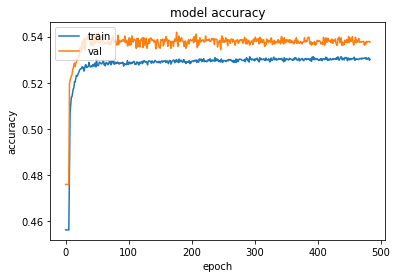

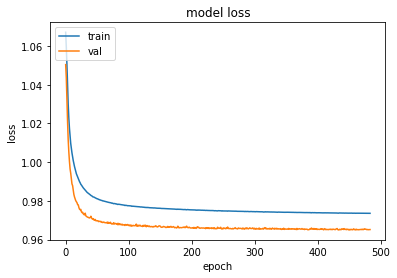

In [20]:
score = model01.evaluate(test_X01, test_y01, verbose=3)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model01.history.history['accuracy'])
plt.plot(model01.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model01.history.history['loss'])
plt.plot(model01.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9563162272626703
Test Accuracy: 0.55397725


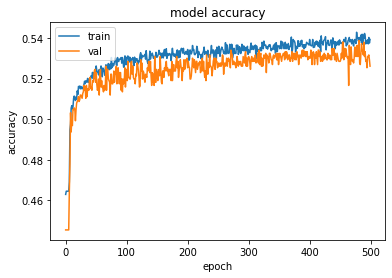

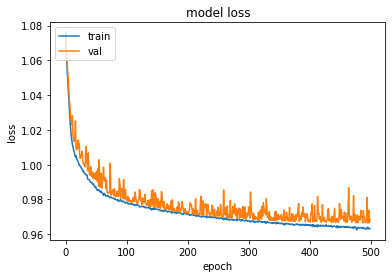

In [21]:
score = model02.evaluate(test_X02, test_y02, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model02.history.history['accuracy'])
plt.plot(model02.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model02.history.history['loss'])
plt.plot(model02.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9587461975487795
Test Accuracy: 0.5568182


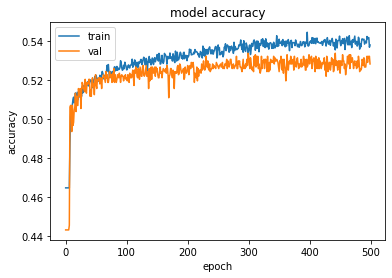

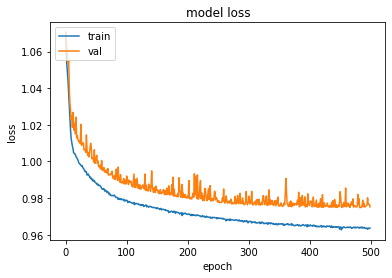

In [22]:
score = model03.evaluate(test_X03, test_y03, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model03.history.history['accuracy'])
plt.plot(model03.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model03.history.history['loss'])
plt.plot(model03.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Test Score: 0.9989140728541783
Test Accuracy: 0.51


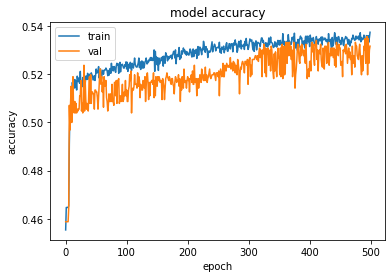

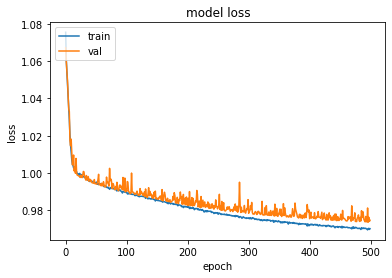

In [23]:
score = model04.evaluate(test_X04, test_y04, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model04.history.history['accuracy'])
plt.plot(model04.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model04.history.history['loss'])
plt.plot(model04.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9597601624897548
Test Accuracy: 0.54571426


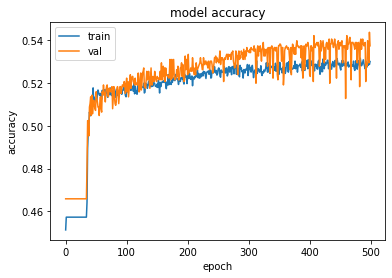

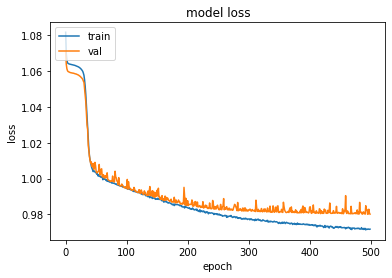

In [24]:
score = model05.evaluate(test_X05, test_y05, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model05.history.history['accuracy'])
plt.plot(model05.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model05.history.history['loss'])
plt.plot(model05.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
pred=model01.predict_proba(test_X01)
for i in range(len(test_X01)):
	print("X=%s, Predicted=%s" % (test_X01[i], pred[i]))

X=[0.06483635 0.12607068 0.16209087 0.07204039 0.21612117 0.07204039
 0.46826253 0.39622214 0.14408078 0.07204039 0.14408078 0.50428272
 0.46826253], Predicted=[0.20318963 0.27229863 0.52451175]
X=[0.08885621 0.10472339 0.0793359  0.12693744 0.06346872 0.12693744
 0.34907796 0.38081232 0.12693744 0.03173436 0.1586718  0.63468721
 0.47601541], Predicted=[0.39326534 0.29016167 0.316573  ]
X=[0.04738266 0.10236995 0.18280349 0.05849712 0.08774568 0.14624279
 0.38023126 0.58497117 0.02924856 0.02924856 0.23398847 0.26323703
 0.55572261], Predicted=[0.17467557 0.27080306 0.55452126]
X=[0.28950333 0.18284421 0.03809254 0.06094807 0.12189614 0.12189614
 0.27426631 0.33521438 0.15237017 0.06094807 0.0914221  0.7009028
 0.36568841], Predicted=[0.6451942 0.2163952 0.1384106]
X=[0.02586835 0.20974337 0.4894012  0.16313373 0.02330482 0.04660964
 0.65253493 0.25635301 0.11652409 0.02330482 0.09321928 0.32626746
 0.25635301], Predicted=[0.01939141 0.09324162 0.88736707]
X=[0.08583162 0.13079104 0.14

 0.52359371], Predicted=[0.28090146 0.2975087  0.42158988]
X=[0.20402639 0.11401474 0.03264422 0.04800621 0.0240031  0.16802173
 0.21602794 0.50406519 0.21602794 0.0240031  0.         0.72009313
 0.21602794], Predicted=[0.6451942 0.2163952 0.1384106]
X=[0.10170083 0.12610903 0.11797296 0.12204099 0.08136066 0.20340166
 0.28476232 0.48816398 0.16272133 0.08136066 0.16272133 0.52884431
 0.48816398], Predicted=[0.33234006 0.29017887 0.37748107]
X=[0.07740012 0.09597615 0.08978414 0.09288015 0.09288015 0.1238402
 0.40248064 0.40248064 0.1238402  0.09288015 0.09288015 0.52632083
 0.55728088], Predicted=[0.2953102  0.2914121  0.41327775]
X=[0.08997702 0.12909747 0.12518542 0.11736134 0.19560223 0.07824089
 0.54768623 0.35208401 0.19560223 0.07824089 0.11736134 0.58680668
 0.27384312], Predicted=[0.32426554 0.28663167 0.38910285]
X=[0.17219479 0.13345096 0.08609739 0.12914609 0.12914609 0.17219479
 0.43048696 0.47353566 0.17219479 0.12914609 0.12914609 0.43048696
 0.47353566], Predicted=[0.48

 0.52864841], Predicted=[0.581714   0.2410211  0.17726487]
X=[0.06318791 0.12998656 0.18053689 0.14442951 0.10832213 0.10832213
 0.43328853 0.39718115 0.03610738 0.07221476 0.25275164 0.25275164
 0.6499328 ], Predicted=[0.21953665 0.29426903 0.48619425]
X=[0.08526679 0.12294281 0.12889166 0.07931794 0.07931794 0.23795383
 0.31727177 0.59488457 0.11897691 0.15863589 0.11897691 0.39658971
 0.47590766], Predicted=[0.24840456 0.2825746  0.46902087]
X=[0.10299575 0.13303618 0.13303618 0.12874469 0.17165959 0.12874469
 0.34331918 0.51497877 0.12874469 0.12874469 0.17165959 0.47206388
 0.47206388], Predicted=[0.31868052 0.2925542  0.38876536]
X=[0.08490741 0.12938273 0.15162038 0.12129631 0.16172841 0.12129631
 0.40432102 0.44475312 0.0404321  0.0808642  0.28302472 0.28302472
 0.60648153], Predicted=[0.28434262 0.3019866  0.41367084]
X=[0.05308511 0.10322104 0.13271276 0.17695035 0.02949173 0.08847518
 0.4718676  0.38339243 0.14745863 0.08847518 0.05898345 0.64881796
 0.32440898], Predicted=[

 0.36887777], Predicted=[0.5501279  0.25192386 0.1979482 ]
X=[0.03611804 0.14586133 0.26393955 0.19448178 0.08334933 0.
 0.75014399 0.19448178 0.05556622 0.16669867 0.05556622 0.27783111
 0.38896355], Predicted=[0.08932211 0.1790884  0.7315895 ]
X=[0.05391848 0.13659347 0.26959238 0.17972826 0.1437826  0.03594565
 0.57513042 0.32351086 0.1437826  0.10783695 0.10783695 0.43134781
 0.43134781], Predicted=[0.09055291 0.20012704 0.70932   ]
X=[0.08872651 0.14066398 0.16230459 0.04328122 0.17312489 0.21640612
 0.21640612 0.51937468 0.08656245 0.08656245 0.25968734 0.21640612
 0.64921835], Predicted=[0.24302348 0.2921671  0.46480942]
X=[0.23966602 0.13481214 0.04194155 0.02995825 0.11983301 0.14979126
 0.26962427 0.50929029 0.23966602 0.0599165  0.         0.65908155
 0.23966602], Predicted=[0.6451942 0.2163952 0.1384106]
X=[0.10721787 0.10721787 0.07706285 0.10051676 0.10051676 0.13402234
 0.43557261 0.53608936 0.20103351 0.10051676 0.03350559 0.60310054
 0.20103351], Predicted=[0.4209267  

 0.57983119], Predicted=[0.18545155 0.2628096  0.5517389 ]
X=[0.08034686 0.09764375 0.0641659  0.13949108 0.05579643 0.08369465
 0.39057501 0.41847323 0.16738929 0.02789822 0.08369465 0.64165895
 0.41847323], Predicted=[0.39588144 0.2844366  0.31968194]
X=[0.25913541 0.12956771 0.04664437 0.03239193 0.12956771 0.16195963
 0.16195963 0.38870312 0.25913541 0.06478385 0.         0.77740624
 0.12956771], Predicted=[0.6451942 0.2163952 0.1384106]
X=[0.07840854 0.09650282 0.08293211 0.03015713 0.0904714  0.18094279
 0.27141419 0.57298551 0.15078566 0.03015713 0.12062853 0.51267125
 0.48251412], Predicted=[0.3121956  0.28496343 0.40284097]
X=[0.05538497 0.10178859 0.12963076 0.08981346 0.11975128 0.08981346
 0.38919166 0.4490673  0.05987564 0.05987564 0.17962692 0.38919166
 0.62869422], Predicted=[0.23461422 0.2894728  0.47591305]
X=[0.03015535 0.18041663 0.38660707 0.12886902 0.07732141 0.05154761
 0.5670237  0.41238087 0.0257738  0.12886902 0.10309522 0.28351185
 0.43815468], Predicted=[0.0

In [26]:
pred=model02.predict_proba(test_X02)
for i in range(len(test_X02)):
	print("X=%s, Predicted=%s" % (test_X02[i], pred[i]))

X=[0.00953979 0.01095309 0.00953979 0.02119954 0.01059977 0.00353326
 0.04593233 0.02473279 0.42045745 0.21199535 0.43812373 0.21199535
 0.01059977 0.01413302 0.01059977 0.03886582 0.0317993  0.55472118
 0.23319489 0.37452513 0.18019605], Predicted=[0.3401664  0.27764192 0.3821917 ]
X=[0.01842289 0.01522959 0.01031682 0.01965108 0.00982554 0.01965108
 0.04421492 0.07860431 0.31933001 0.13755754 0.52075355 0.2407257
 0.01473831 0.01473831 0.01965108 0.03930216 0.04912769 0.55514294
 0.28002785 0.35863216 0.14247031], Predicted=[0.4617434  0.26787782 0.27037877]
X=[0.0065762  0.01315241 0.01644051 0.01096034 0.00730689 0.01826723
 0.03288102 0.05114825 0.43841354 0.21189988 0.53340314 0.2849688
 0.00730689 0.01461378 0.01461378 0.04018791 0.05114825 0.32150326
 0.1424844  0.43476009 0.27400846], Predicted=[0.21510431 0.2794782  0.50541747]
X=[0.00833604 0.0135703  0.01279485 0.01550891 0.00775446 0.01550891
 0.04264951 0.06203566 0.3954773  0.20549311 0.47302187 0.3140555
 0.01550891 0.0

 0.16606693 0.39174762 0.15755067], Predicted=[0.07920893 0.17389949 0.74689156]
X=[0.0074485  0.01092447 0.01092447 0.01324178 0.01655222 0.00331044
 0.02317311 0.00993133 0.37076979 0.19531623 0.45684135 0.19862667
 0.01324178 0.01324178 0.00662089 0.04965667 0.04303578 0.32442357
 0.17545356 0.59256957 0.28800868], Predicted=[0.26758024 0.29287893 0.4395408 ]
X=[0.00918425 0.01388317 0.01537828 0.01708697 0.01281523 0.01281523
 0.03844569 0.04271744 0.35455472 0.20931544 0.48270703 0.25630462
 0.00427174 0.01281523 0.02563046 0.04271744 0.07689139 0.46134832
 0.21358718 0.46134832 0.21785893], Predicted=[0.23472042 0.28175047 0.4835291 ]
X=[0.00957052 0.0127607  0.01236192 0.01196315 0.00797543 0.01993859
 0.04785261 0.05981576 0.48251379 0.22729989 0.46656292 0.19141043
 0.01196315 0.01595087 0.01196315 0.04386489 0.03987717 0.35490684
 0.17944728 0.47852607 0.25122619], Predicted=[0.32223314 0.29077613 0.38699082]
X=[0.00552609 0.0156392  0.02528277 0.0144473  0.01083547 0.0108354

In [27]:
pred=model03.predict_proba(test_X03)
for i in range(len(test_X03)):
	print("X=%s, Predicted=%s" % (test_X03[i], pred[i]))

X=[0.00624648 0.01878282 0.03036484 0.026027   0.0130135  0.00433783
 0.06940534 0.03036484 0.47282389 0.23424303 0.41643205 0.16049985
 0.01735134 0.00433783 0.02168917 0.05205401 0.06940534 0.36871588
 0.14748635 0.51620223 0.28629704 0.00214902 0.00128528 0.00167187
 0.00082067 0.00173513 0.001531   0.00240586 0.0010516 ], Predicted=[0.13329855 0.2251728  0.6415286 ]
X=[4.14262666e-03 2.07131333e-02 5.17828332e-02 2.41653222e-02
 6.90437776e-03 3.45218888e-03 4.83306443e-02 1.72609444e-02
 6.04133054e-01 2.96888244e-01 2.76175110e-01 1.31183177e-01
 2.41653222e-02 6.90437776e-03 3.45218888e-03 4.83306443e-02
 2.07131333e-02 4.55688932e-01 2.20940088e-01 3.93549532e-01
 1.79513822e-01 1.69650425e-03 5.61984236e-04 1.63978972e-03
 4.54235379e-04 1.67378855e-03 7.55166317e-04 1.57468265e-03
 3.98329486e-04], Predicted=[0.03686036 0.09760568 0.865534  ]
X=[9.98154652e-03 1.13124194e-02 8.31795543e-03 6.65436435e-03
 6.65436435e-03 1.99630930e-02 3.99261861e-02 6.32164613e-02
 3.16082306

 2.88518728e-04], Predicted=[0.40501678 0.28079823 0.31418502]
X=[7.43462331e-03 1.13289498e-02 1.32761131e-02 1.41611873e-02
 1.41611873e-02 7.08059363e-03 3.89432650e-02 2.47820777e-02
 4.03593837e-01 2.05337215e-01 5.20423632e-01 2.65522261e-01
 7.08059363e-03 1.41611873e-02 1.41611873e-02 2.83223745e-02
 3.54029682e-02 3.43408791e-01 1.87635731e-01 4.81480367e-01
 2.51361074e-01 1.80120364e-03 6.71435603e-04 1.80627389e-03
 3.30427703e-04 1.93438898e-03 5.34384425e-04 1.84824319e-03
 4.98633354e-04], Predicted=[0.30875602 0.2840104  0.40723357]
X=[1.56047278e-02 1.49805387e-02 8.73864756e-03 1.24837822e-02
 4.16126074e-03 2.49675645e-02 1.66450430e-02 7.07414326e-02
 3.28739599e-01 1.53966648e-01 5.20157593e-01 2.66320688e-01
 1.66450430e-02 8.32252149e-03 1.66450430e-02 5.82576504e-02
 5.40963897e-02 4.49416160e-01 2.70481948e-01 4.28609857e-01
 2.33030602e-01 1.94894491e-03 4.49866026e-04 2.13056550e-03
 1.10533488e-03 2.50446248e-03 8.96271545e-04 2.26243303e-03
 9.66006958e-04]

In [28]:
pred=model04.predict_proba(test_X04)
for i in range(len(test_X04)):
	print("X=%s, Predicted=%s" % (test_X04[i], pred[i]))

X=[0.00232421 0.00348631 0.00359196 0.00633875 0.00105646 0.00316937
 0.0200727  0.01162104 0.08134726 0.04859707 0.49442233 0.09825059
 0.04859707 0.46695443 0.00422583 0.00316937 0.00316937 0.01479041
 0.01479041 0.14050891 0.07817789 0.48068838 0.14367828 0.08240372
 0.48068838], Predicted=[0.21982214 0.2641991  0.51597875]
X=[0.00214515 0.00366245 0.00355781 0.00418566 0.00209283 0.00418566
 0.01360339 0.01778905 0.09208447 0.04604224 0.43216917 0.14754444
 0.0941773  0.52006798 0.00104641 0.00313924 0.00627849 0.01046414
 0.01778905 0.08894523 0.04185658 0.42379785 0.16010141 0.0795275
 0.5284393 ], Predicted=[0.26415807 0.27423194 0.46161002]
X=[0.00207499 0.00352749 0.00394249 0.00311249 0.00414999 0.00311249
 0.00933748 0.01452496 0.14732463 0.08092479 0.42848641 0.17533705
 0.09129977 0.51563619 0.00414999 0.0010375  0.00518749 0.01556246
 0.01867495 0.10478723 0.05187487 0.46168633 0.13279966 0.07054982
 0.48243627], Predicted=[0.29220054 0.27933154 0.42846796]
X=[0.01051165 

 0.50423507], Predicted=[0.06214301 0.1647118  0.7731452 ]
X=[0.00133494 0.0051742  0.01138324 0.00413936 0.00310452 0.00310452
 0.01138324 0.00931356 0.1510867  0.07657819 0.60331195 0.097275
 0.04656782 0.33839281 0.00310452 0.         0.00724388 0.00931356
 0.01448777 0.09520532 0.03828909 0.4097968  0.12418085 0.06002074
 0.53190797], Predicted=[0.06521825 0.16891594 0.76586586]
X=[0.0020393  0.00376485 0.00439233 0.00522896 0.00313738 0.00209159
 0.02405323 0.01045793 0.16837261 0.08993816 0.50407204 0.10457926
 0.0564728  0.44759924 0.00522896 0.00209159 0.00313738 0.01254951
 0.00836634 0.12444932 0.07215969 0.51452997 0.11503719 0.06483914
 0.43714131], Predicted=[0.16263354 0.24028923 0.5970772 ]
X=[0.00149517 0.00480589 0.00961178 0.00533988 0.00320393 0.00213595
 0.01815558 0.00961178 0.10893351 0.0523308  0.48272496 0.09291387
 0.04485497 0.48913281 0.00213595 0.00213595 0.00640785 0.00747583
 0.01922356 0.11320541 0.05660271 0.45282164 0.09504983 0.043787
 0.51903613], Pre

In [29]:
pred=model05.predict_proba(test_X05)
for i in range(len(test_X05)):
	print("X=%s, Predicted=%s" % (test_X05[i], pred[i]))

X=[2.34163145e-03 3.38235653e-03 3.53846530e-03 6.24435053e-03
 2.08145018e-03 2.08145018e-03 1.76923265e-02 1.56108763e-02
 9.15838077e-02 3.95475533e-02 4.32941636e-01 1.68597464e-01
 7.70136565e-02 5.14118193e-01 2.08145018e-03 2.08145018e-03
 6.24435053e-03 7.28507561e-03 1.24887011e-02 1.33212811e-01
 6.66064056e-02 4.29819461e-01 1.54027313e-01 7.70136565e-02
 5.16199643e-01 4.49404015e-04 4.65587539e-04 4.75392941e-04
 2.10957788e-04 5.20362544e-04 1.13829306e-04 5.20362544e-04
 1.68766230e-04], Predicted=[0.23851424 0.27849698 0.48298877]
X=[2.19958410e-03 3.45648930e-03 3.92782874e-03 6.28452599e-03
 3.14226300e-03 1.04742100e-03 1.57113150e-02 7.33194699e-03
 1.36164730e-01 6.91297859e-02 6.01219653e-01 8.06514169e-02
 3.98019979e-02 3.51933456e-01 6.28452599e-03 3.14226300e-03
 1.04742100e-03 1.99009990e-02 1.04742100e-02 1.12074047e-01
 5.65607339e-02 4.95430132e-01 9.63627319e-02 4.81813659e-02
 4.57722976e-01 5.31767584e-04 2.38050227e-04 5.16909064e-04
 1.92945973e-04 5.

 2.04522109e-04], Predicted=[0.15110807 0.22406398 0.6248279 ]
X=[1.64398013e-03 4.18848440e-03 6.28272659e-03 7.32984769e-03
 1.04712110e-03 2.09424220e-03 2.19895431e-02 1.57068165e-02
 1.47644075e-01 8.16754457e-02 4.93194038e-01 1.48691196e-01
 8.16754457e-02 4.59686162e-01 3.14136330e-03 5.23560549e-03
 2.09424220e-03 1.67539376e-02 1.57068165e-02 1.03664989e-01
 4.39790861e-02 4.69110252e-01 1.26701653e-01 6.28272659e-02
 4.83769948e-01 5.79258480e-04 2.81917219e-04 5.75179195e-04
 2.01369442e-04 4.44233193e-04 3.98903276e-04 5.19233603e-04
 2.61780275e-04], Predicted=[0.1572145  0.22757779 0.6152077 ]
X=[2.04371265e-03 3.45859063e-03 4.40184263e-03 1.04805777e-03
 6.28834661e-03 3.14417330e-03 1.04805777e-02 1.25766932e-02
 9.32771413e-02 4.71625996e-02 4.10838645e-01 1.58256723e-01
 7.23159860e-02 5.40797808e-01 1.04805777e-03 6.28834661e-03
 3.14417330e-03 8.38446214e-03 1.25766932e-02 8.80368525e-02
 3.56339641e-02 4.53809014e-01 1.63497012e-01 7.96523904e-02
 4.98875498e-01 